In [2]:
# !pip install transformers pandas
# !pip install nltk

In [3]:
from transformers import pipeline
import pandas as pd

2025-06-10 14:01:48.101553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749556908.158029   16601 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749556908.179662   16601 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749556908.290193   16601 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749556908.290234   16601 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749556908.290236   16601 computation_placer.cc:177] computation placer alr

In [4]:
pwd

'/home/dorothee/code/magadare/emotionplot2/notebooks'

In [5]:
df = pd.read_csv("/home/dorothee/code/magadare/emotionplot2/raw_data/emotion_sentimen_dataset.csv")
df.head()

Unnamed: 0                                               text  Emotion
0           0  i seriously hate one subject to death but now ...     hate
1           1                 im so full of life i feel appalled  neutral
2           2  i sit here to write i start to dig out my feel...  neutral
3           3  ive been really angry with r and i feel like a...    anger
4           4  i feel suspicious if there is no one outside l...  neutral

In [6]:
# Load the emotion classification pipeline
classifier = pipeline(
    task="text-classification",
    model="SamLowe/roberta-base-go_emotions",
    top_k=None  # Return all possible emotion labels
)

# Load the CSV file
df = pd.read_csv("/home/dorothee/code/magadare/emotionplot2/raw_data/emotion_sentimen_dataset.csv")
df = df.head(250)

# Classify each phrase
phrases = df["text"].tolist()
results = classifier(phrases)

# Filter emotions with score above threshold
def filter_emotions(scores, threshold=0.5):
    return {s["label"]: round(s["score"], 3) for s in scores if s["score"] > threshold}

df["emotions"] = [filter_emotions(r, threshold=0.5) for r in results]

# Save results to CSV
# df.to_csv("/home/dorothee/code/magadare/emotionplot2/raw_data/phrases_with_emotions.csv", index=False)


Device set to use cpu


In [7]:
# results

In [8]:
df.head()

Unnamed: 0                                               text  Emotion  \
0           0  i seriously hate one subject to death but now ...     hate   
1           1                 im so full of life i feel appalled  neutral   
2           2  i sit here to write i start to dig out my feel...  neutral   
3           3  ive been really angry with r and i feel like a...    anger   
4           4  i feel suspicious if there is no one outside l...  neutral   

               emotions  
0      {'anger': 0.502}  
1                    {}  
2       {'fear': 0.854}  
3      {'anger': 0.811}  
4  {'curiosity': 0.572}

In [10]:
emotions_df = df["emotions"].apply(pd.Series).fillna(0)
emotions_df.head()

anger   fear  curiosity  desire  sadness  nervousness  annoyance  \
0  0.502  0.000      0.000     0.0      0.0          0.0        0.0   
1  0.000  0.000      0.000     0.0      0.0          0.0        0.0   
2  0.000  0.854      0.000     0.0      0.0          0.0        0.0   
3  0.811  0.000      0.000     0.0      0.0          0.0        0.0   
4  0.000  0.000      0.572     0.0      0.0          0.0        0.0   

   admiration  joy  gratitude  ...  amusement  confusion  embarrassment  love  \
0         0.0  0.0        0.0  ...        0.0        0.0            0.0   0.0   
1         0.0  0.0        0.0  ...        0.0        0.0            0.0   0.0   
2         0.0  0.0        0.0  ...        0.0        0.0            0.0   0.0   
3         0.0  0.0        0.0  ...        0.0        0.0            0.0   0.0   
4         0.0  0.0        0.0  ...        0.0        0.0            0.0   0.0   

   remorse  caring  excitement  disapproval  disgust  surprise  
0      0.0     0.0         0.0          0.0      0.0       0.0  
1      0.0     0.0         0.0          0.0      0.0       0.0  
2      0.0     0.0         0.0          0.0      0.0       0.0  
3      0.0     0.0         0.0          0.0      0.0       0.0  
4      0.0     0.0         0.0          0.0      0.0       0.0  

[5 rows x 25 columns]

In [14]:
emotions_df["embarrassment"].sort_values(ascending=False)

60     0.553
0      0.000
2      0.000
3      0.000
4      0.000
       ...  
245    0.000
246    0.000
247    0.000
248    0.000
249    0.000
Name: embarrassment, Length: 250, dtype: float64

In [15]:
df.iloc[60]

Unnamed: 0                                                   60
text          i am ashamed when i feel like that the moment ...
Emotion                                                 neutral
emotions                               {'embarrassment': 0.553}
Name: 60, dtype: object

In [16]:
pwd

'/home/dorothee/code/magadare/emotionplot2/notebooks'

In [20]:

with open("/home/dorothee/code/magadare/emotionplot2/raw_data/SherlockHolmes.txt") as file:
    data = file.read()

In [37]:
# data

In [ ]:
import re
import pandas as pd

def split_into_sentences(data):
    sentences = re.split(r'(?<=[.!?])\s+', text)  # Splits text while preserving punctuation
    return sentences

def create_dataframe(text_data):
    sentences = split_into_sentences(data)
    df = pd.DataFrame({"Sentence": sentences})
    return df
# Example usage

df = create_dataframe(text)
# Display DataFrame
print(df)

                                            Sentence
0      To Sherlock Holmes she is always _the_ woman.
1  I have seldom heard him mention her under any ...
2  In his eyes she eclipses and predominates the ...


In [26]:
split_into_sentences(data)

['To Sherlock Holmes she is always _the_ woman.',
 'I have seldom heard him mention her under any other name.',
 'In his eyes she eclipses and predominates the whole of her sex.']

In [41]:
import nltk

nltk.download('punkt')
from nltk.tokenize import sent_tokenize
def chunk_by_sentences(text, sentences_per_chunk= 3):
    sentences = sent_tokenize(text)
    chunks = []
    for i in range(0, len(sentences), sentences_per_chunk):
        chunk = sentences[i:i+sentences_per_chunk]
        chunks.append(" ".join(chunk))
    return chunks
chunks = chunk_by_sentences(data, sentences_per_chunk=3)
# Create DataFrame with each chunk as a row
df = pd.DataFrame({'chunk': chunks})
#print(df.head())
df


[nltk_data] Downloading package punkt to /home/dorothee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


chunk
0     \nTo Sherlock Holmes she is always _the_ woman...
1     It was not that he felt any emotion\\nakin to ...
2     He never spoke of the softer passions, save wi...
3     Grit in a sensitive\\ninstrument, or a crack i...
4     My own complete happiness, and the home-centre...
...                                                 ...
1252  Ah, miss, it is a pity you didn\'92t let me kn...
1253  She was slighted like and had no say in anythi...
1254  He wanted her\\nto sign a paper, so that wheth...
1255  Mr. Rucastle then, I presume, took to this sys...
1256  Mr. Rucastle survived, but was always a\\nbrok...

[1257 rows x 1 columns]

In [45]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

def predict_emotion(text):
    # Tokenize input sentence
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)
    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    # Get the predicted emotion label
    predicted_label = torch.argmax(probabilities).item()
    return predicted_label

# Load your DataFrame (assuming it's called df)
df["Predicted_Emotion"] = df["chunk"].apply(predict_emotion)
# Print results
print(df.head())

                                               chunk  Predicted_Emotion
0  \nTo Sherlock Holmes she is always _the_ woman...                 27
1  It was not that he felt any emotion\\nakin to ...                 27
2  He never spoke of the softer passions, save wi...                 27
3  Grit in a sensitive\\ninstrument, or a crack i...                 27
4  My own complete happiness, and the home-centre...                 27


In [46]:
from transformers import AutoModelForSequenceClassification
# Load the model
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")
# Get emotion labels
emotion_labels = model.config.id2label  # Dictionary mapping ID to emotion name
# Print all labels
print(emotion_labels)

{0: 'admiration', 1: 'amusement', 2: 'anger', 3: 'annoyance', 4: 'approval', 5: 'caring', 6: 'confusion', 7: 'curiosity', 8: 'desire', 9: 'disappointment', 10: 'disapproval', 11: 'disgust', 12: 'embarrassment', 13: 'excitement', 14: 'fear', 15: 'gratitude', 16: 'grief', 17: 'joy', 18: 'love', 19: 'nervousness', 20: 'optimism', 21: 'pride', 22: 'realization', 23: 'relief', 24: 'remorse', 25: 'sadness', 26: 'surprise', 27: 'neutral'}


In [52]:
df["Emotion_Name"] = df["Predicted_Emotion"].map(emotion_labels)
print(df.head())  # View updated DataFrame with emotions

                                               chunk  Predicted_Emotion  \
0  \nTo Sherlock Holmes she is always _the_ woman...                 27   
1  It was not that he felt any emotion\\nakin to ...                 27   
2  He never spoke of the softer passions, save wi...                 27   
3  Grit in a sensitive\\ninstrument, or a crack i...                 27   
4  My own complete happiness, and the home-centre...                 27   

  Emotion_Name  
0      neutral  
1      neutral  
2      neutral  
3      neutral  
4      neutral  


In [66]:
df.iloc[100]


chunk                The alarm of fire was admirably done. The smok...
Predicted_Emotion                                                    0
Emotion_Name                                                admiration
Name: 100, dtype: object

In [53]:
df["Emotion_Name"].value_counts()

Emotion_Name
neutral           978
sadness            35
admiration         33
fear               29
curiosity          27
amusement          24
surprise           20
approval           18
confusion          13
optimism           12
gratitude          12
caring             11
disappointment      8
joy                 8
remorse             7
desire              6
embarrassment       3
realization         3
love                2
disapproval         2
anger               2
annoyance           2
excitement          1
nervousness         1
Name: count, dtype: int64

In [1]:
emotionlist = df["Emotion_Name"].tolist()

NameError: name 'df' is not defined

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Method 2: Stacked area plot
def plot_emotion_evolution_stacked(df):
    """Plot emotions as stacked area chart"""
    emotion_counts = df.groupby(['chunk', 'Emotion_Name']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 6))
    plt.stackplot(emotion_counts.index, *[emotion_counts[col] for col in emotion_counts.columns],
                  labels=emotion_counts.columns, alpha=0.8)

    plt.title('Emotion Evolution - Stacked View', fontsize=16, fontweight='bold')
    plt.xlabel('Chunk', fontsize=12)
    plt.ylabel('Cumulative Emotion Count', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Analyzing emotion evolution...
Dataset shape: (1257, 3)
Emotions found: ['neutral', 'sadness', 'disappointment', 'admiration', 'amusement', 'confusion', 'surprise', 'optimism', 'embarrassment', 'approval', 'desire', 'realization', 'love', 'remorse', 'caring', 'fear', 'curiosity', 'gratitude', 'joy', 'disapproval', 'anger', 'excitement', 'annoyance', 'nervousness']
Chunk range: 
To Sherlock Holmes she is always _the_ woman. I have seldom heard him\
mention her under any other name. In his eyes she eclipses and\
predominates the whole of her sex. to you thief! How dare you touch that\
coronet?\'92\
\
\'93The gas was half up, as I had left it, and my unhappy boy, dressed\
only in his shirt and trousers, was standing beside the light, holding\
the coronet in his hands. He appeared to be wrenching at it, or bending\
it with all his strength.


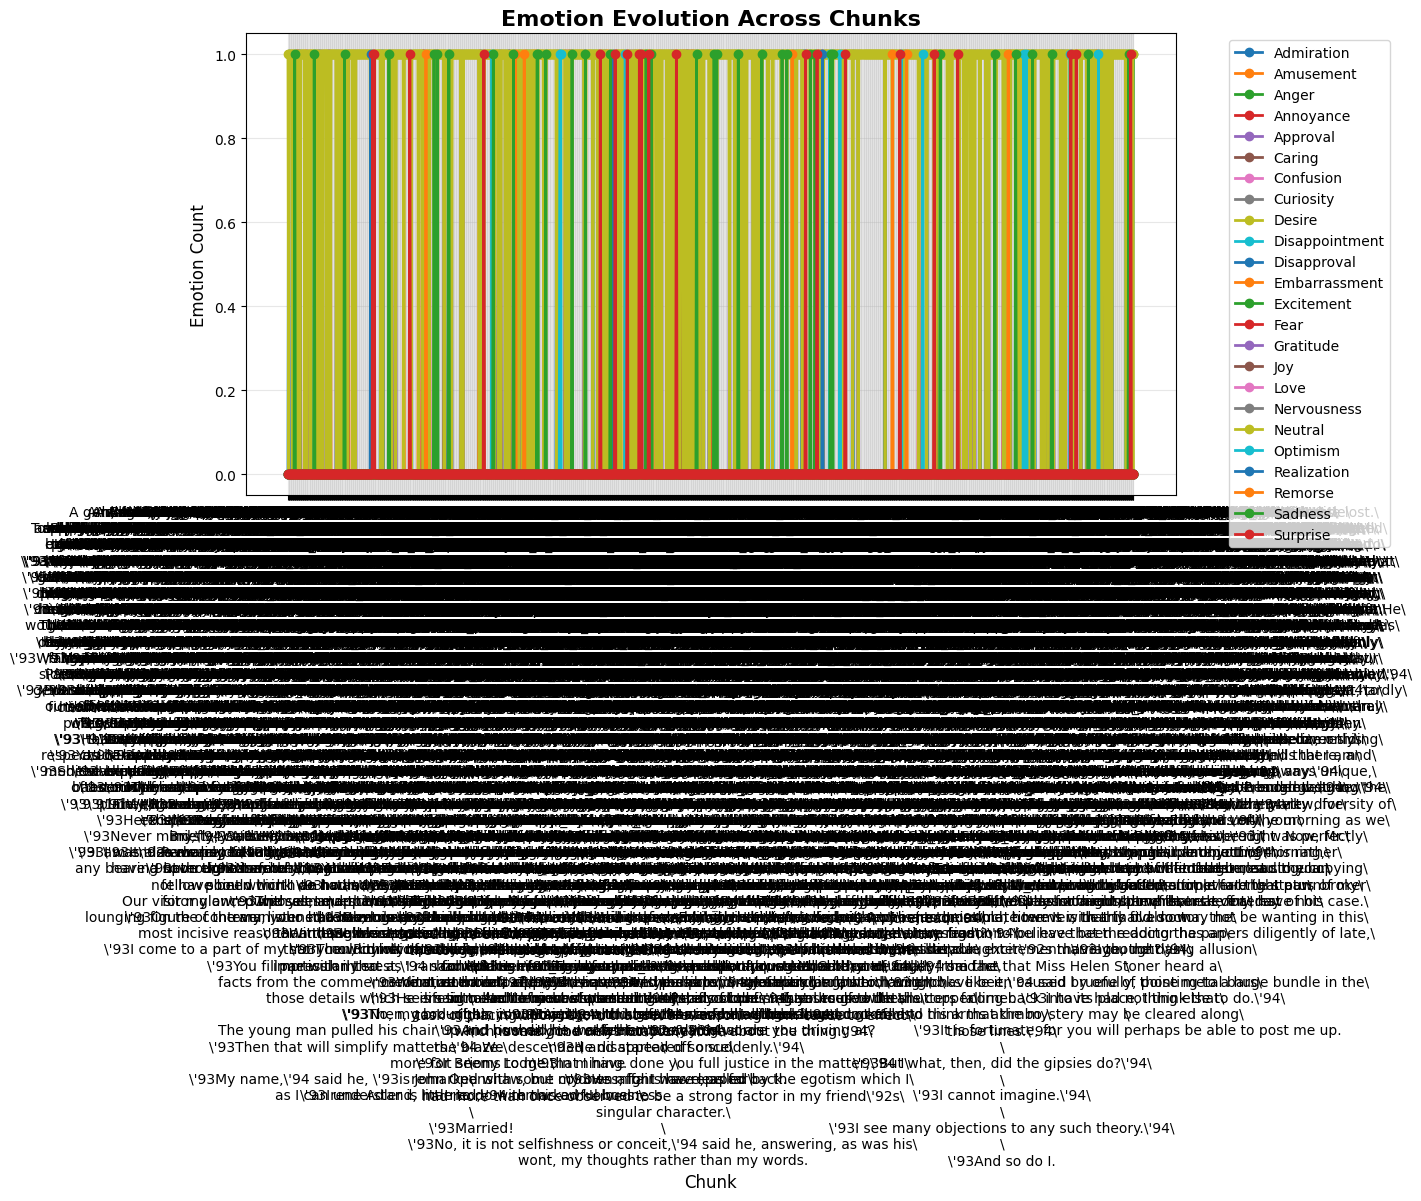

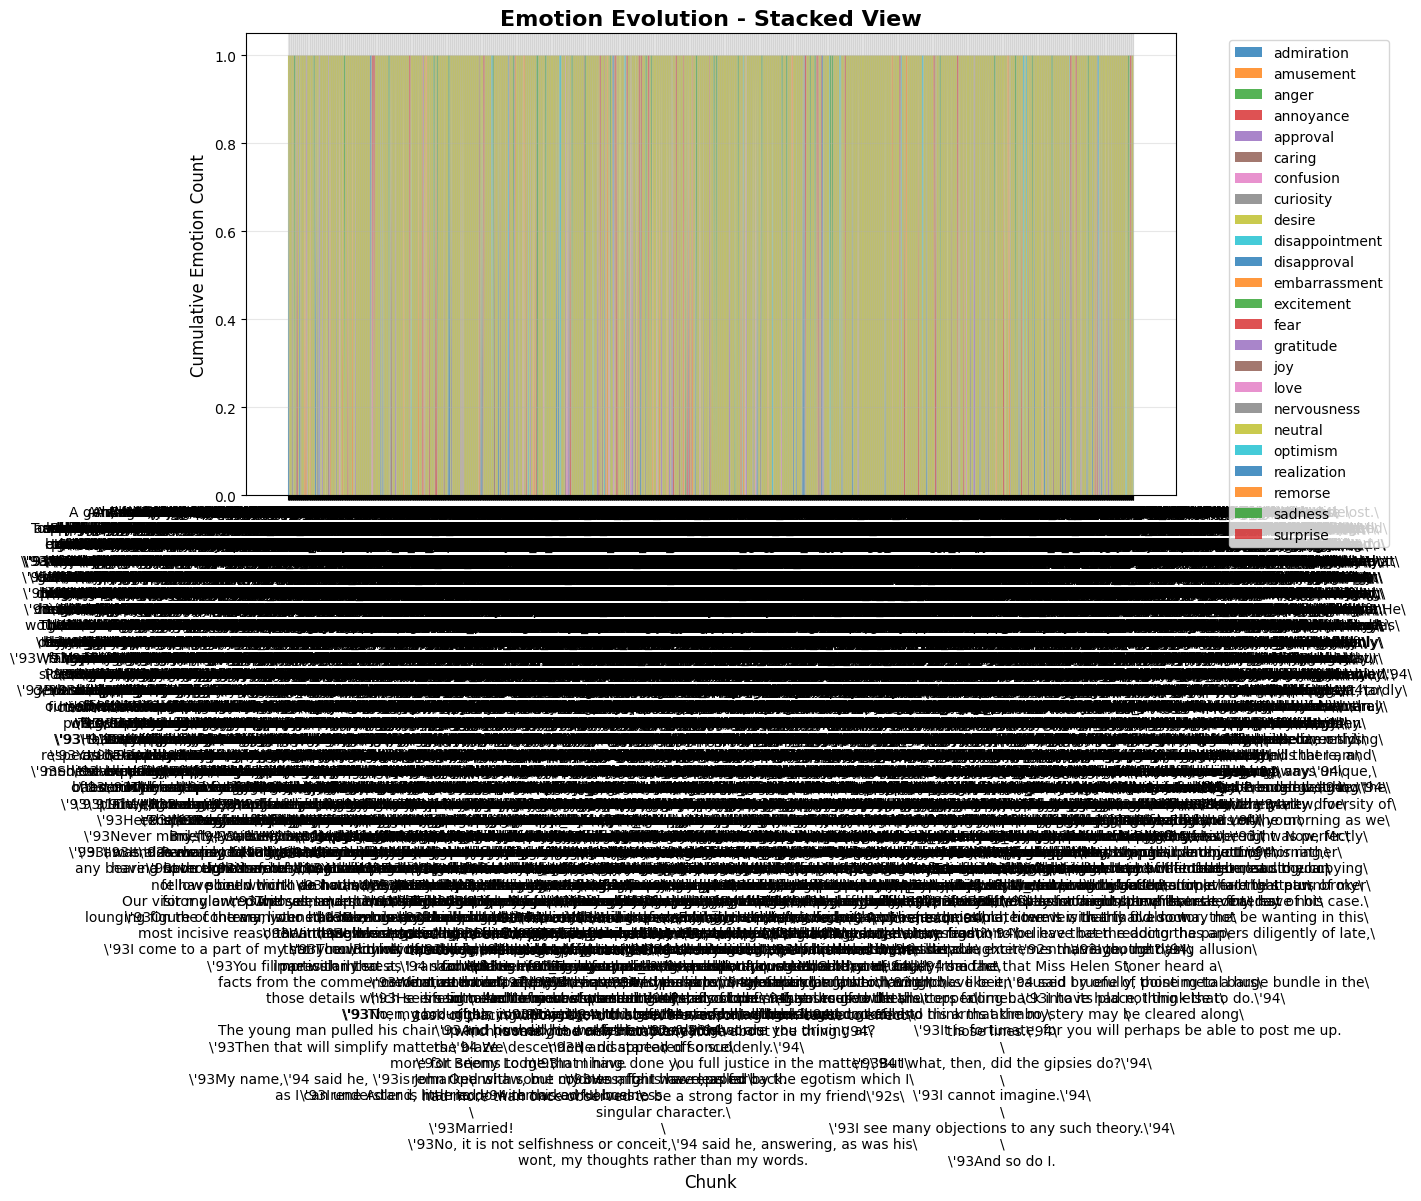

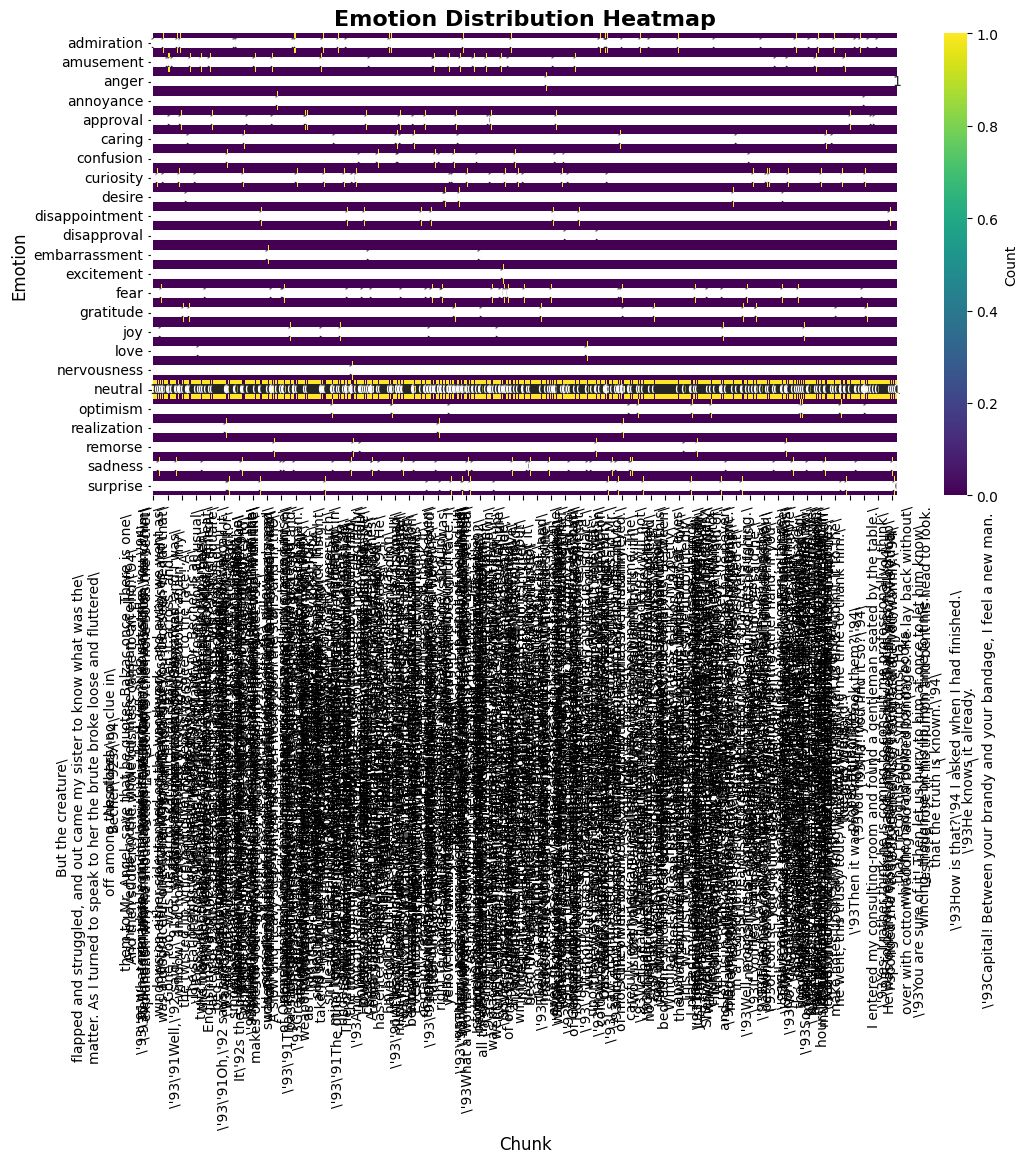

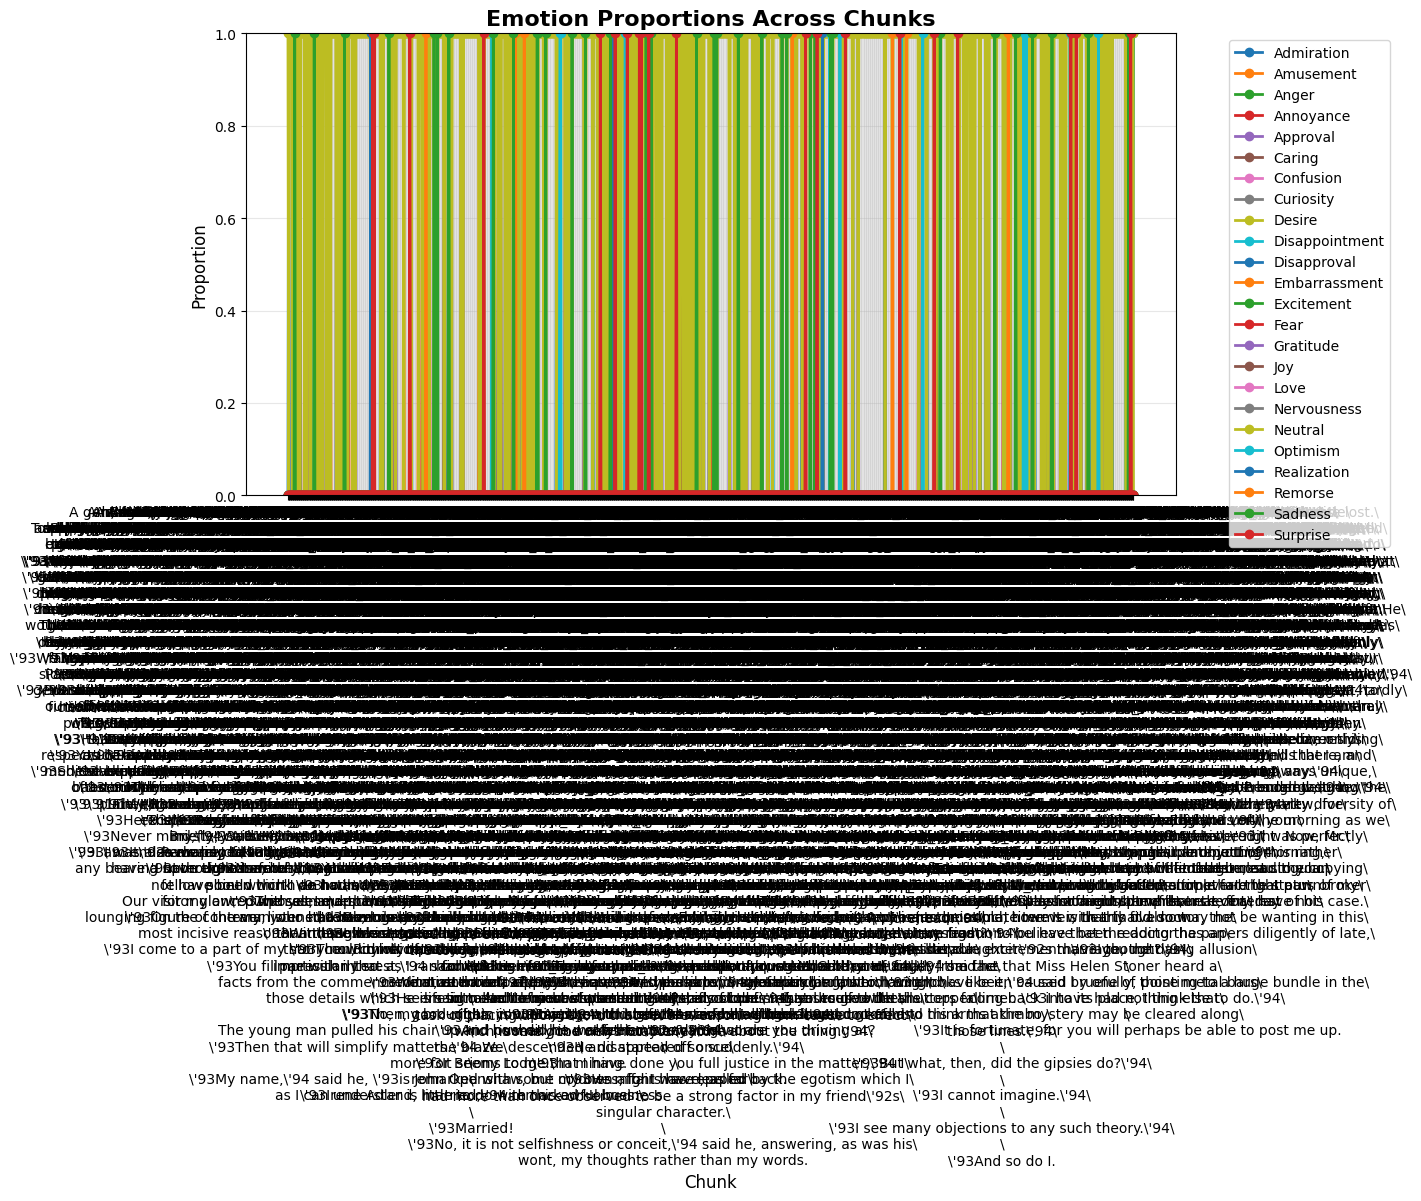

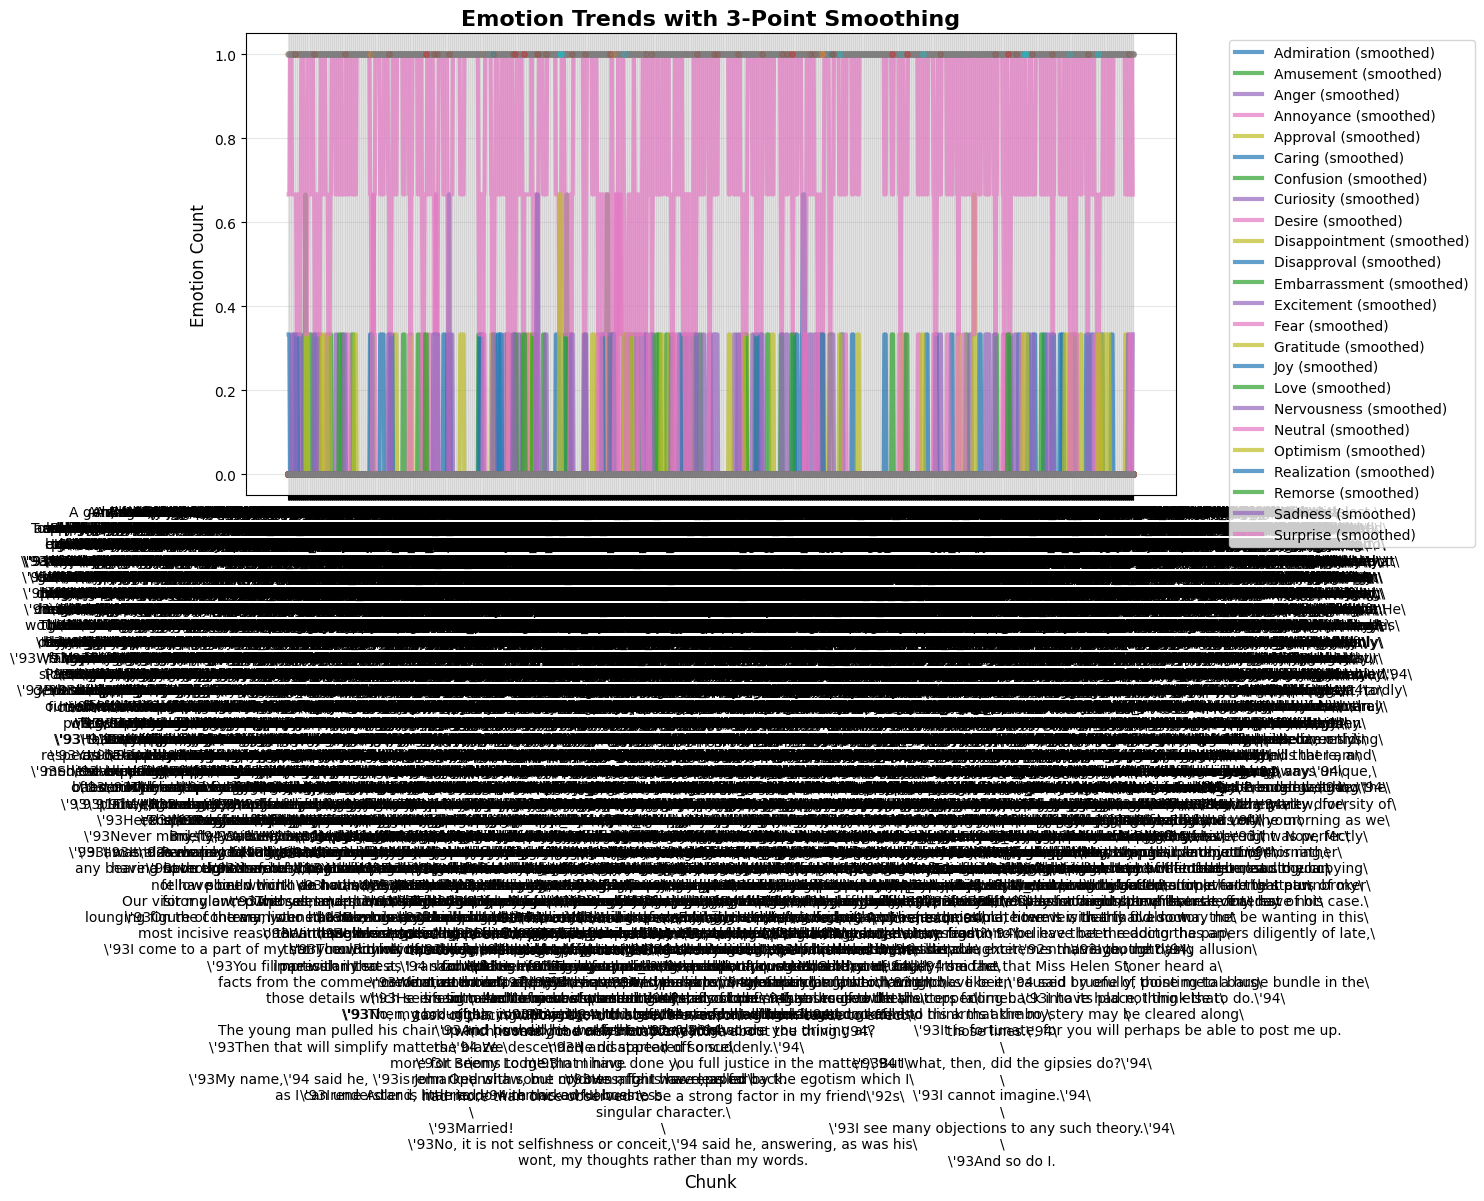

=== EMOTION EVOLUTION STATISTICS ===

1. Overall emotion distribution:


KeyError: 'emotionname'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Assuming your dataframe is called 'df' with columns 'chunk' and 'emotionname'
# df = pd.read_csv('your_file.csv')  # Load your data

# Method 1: Count emotions per chunk and plot as lines
def plot_emotion_evolution_lines(df):
    """Plot emotion evolution as line chart"""
    # Count emotions per chunk
    emotion_counts = df.groupby(['chunk', 'Emotion_Name']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 6))

    # Plot each emotion as a separate line
    for emotion in emotion_counts.columns:
        plt.plot(emotion_counts.index, emotion_counts[emotion],
                marker='o', linewidth=2, label=emotion.capitalize())

    plt.title('Emotion Evolution Across Chunks', fontsize=16, fontweight='bold')
    plt.xlabel('Chunk', fontsize=12)
    plt.ylabel('Emotion Count', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()



# Method 3: Heatmap
def plot_emotion_heatmap(df):
    """Plot emotions as heatmap"""
    emotion_counts = df.groupby(['chunk', 'Emotion_Name']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 6))
    sns.heatmap(emotion_counts.T, annot=True, cmap='viridis',
                cbar_kws={'label': 'Count'}, fmt='d')

    plt.title('Emotion Distribution Heatmap', fontsize=16, fontweight='bold')
    plt.xlabel('Chunk', fontsize=12)
    plt.ylabel('Emotion', fontsize=12)
    plt.tight_layout()
    plt.show()

# Method 4: Proportion-based evolution
def plot_emotion_proportions(df):
    """Plot emotion proportions per chunk"""
    # Calculate proportions
    emotion_counts = df.groupby(['chunk', 'Emotion_Name']).size().unstack(fill_value=0)
    emotion_props = emotion_counts.div(emotion_counts.sum(axis=1), axis=0)

    plt.figure(figsize=(12, 6))

    for emotion in emotion_props.columns:
        plt.plot(emotion_props.index, emotion_props[emotion],
                marker='o', linewidth=2, label=emotion.capitalize())

    plt.title('Emotion Proportions Across Chunks', fontsize=16, fontweight='bold')
    plt.xlabel('Chunk', fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Method 5: Advanced analysis with smoothing
def plot_emotion_trends_smooth(df, window=3):
    """Plot emotion trends with smoothing"""
    emotion_counts = df.groupby(['chunk', 'Emotion_Name']).size().unstack(fill_value=0)

    # Apply rolling average for smoothing
    emotion_smooth = emotion_counts.rolling(window=window, center=True).mean()

    plt.figure(figsize=(12, 6))

    for emotion in emotion_smooth.columns:
        plt.plot(emotion_smooth.index, emotion_smooth[emotion],
                linewidth=3, alpha=0.7, label=f'{emotion.capitalize()} (smoothed)')
        plt.plot(emotion_counts.index, emotion_counts[emotion],
                'o', alpha=0.4, markersize=4)

    plt.title(f'Emotion Trends with {window}-Point Smoothing', fontsize=16, fontweight='bold')
    plt.xlabel('Chunk', fontsize=12)
    plt.ylabel('Emotion Count', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Method 6: Statistical summary
def analyze_emotion_statistics(df):
    """Provide statistical analysis of emotion evolution"""
    emotion_counts = df.groupby(['chunk', 'Emotion_Name']).size().unstack(fill_value=0)

    print("=== EMOTION EVOLUTION STATISTICS ===\n")

    print("1. Overall emotion distribution:")
    total_emotions = df['emotionname'].value_counts()
    print(total_emotions)
    print(f"\nTotal records: {len(df)}")
    print(f"Unique emotions: {df['Emotion_Name'].nunique()}")
    print(f"Chunk range: {df['chunk'].min()} - {df['chunk'].max()}")

    print("\n2. Emotion trends (correlation with chunk number):")
    correlations = {}
    for emotion in emotion_counts.columns:
        corr = np.corrcoef(emotion_counts.index, emotion_counts[emotion])[0,1]
        correlations[emotion] = corr

    sorted_corr = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
    for emotion, corr in sorted_corr:
        trend = "increasing" if corr > 0.1 else "decreasing" if corr < -0.1 else "stable"
        print(f"  {emotion.capitalize()}: {corr:.3f} ({trend})")

    print("\n3. Most/least common emotions per chunk:")
    for chunk in sorted(df['chunk'].unique()):
        chunk_emotions = df[df['chunk'] == chunk]['Emotion_Name'].value_counts()
        if len(chunk_emotions) > 0:
            most_common = chunk_emotions.index[0]
            print(f"  Chunk {chunk}: {most_common} ({chunk_emotions.iloc[0]} occurrences)")

# Run the analysis
if __name__ == "__main__":
    print("Analyzing emotion evolution...")

    # Display basic info
    print(f"Dataset shape: {df.shape}")
    print(f"Emotions found: {list(df['Emotion_Name'].unique())}")
    print(f"Chunk range: {df['chunk'].min()} to {df['chunk'].max()}")

    # Generate all plots
    plot_emotion_evolution_lines(df)
    plot_emotion_evolution_stacked(df)
    plot_emotion_heatmap(df)
    plot_emotion_proportions(df)
    plot_emotion_trends_smooth(df, window=3)

    # Print statistical analysis
    analyze_emotion_statistics(df)

# Quick one-liner for basic plot:
# df.groupby(['chunk', 'emotionname']).size().unstack(fill_value=0).plot(kind='line', figsize=(12, 6))
# plt.title('Emotion Evolution'); plt.show()

# For interactive plots (if you have plotly installed):
"""
import plotly.express as px
import plotly.graph_objects as go

def plot_interactive_emotion_evolution(df):
    emotion_counts = df.groupby(['chunk', 'emotionname']).size().reset_index(name='count')

    fig = px.line(emotion_counts, x='chunk', y='count', color='emotionname',
                  title='Interactive Emotion Evolution',
                  labels={'count': 'Emotion Count', 'chunk': 'Chunk'})

    fig.update_layout(
        xaxis_title="Chunk",
        yaxis_title="Count",
        legend_title="Emotion"
    )

    fig.show()

# plot_interactive_emotion_evolution(df)
"""

# Trying to extract book metadata

In [ ]:
from bs4 import BeautifulSoup
import requests


In [73]:
url = "https://www.gutenberg.org/files/1661/1661-0.txt"
resp = requests.get(url)
raw_text = resp.text

In [80]:
# raw_text

In [72]:
# <span>*** START OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***</span>
# <span>*** END OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***</span>
# <p class="pfirst">

In [77]:
import requests
from bs4 import BeautifulSoup

url = "https://www.gutenberg.org/cache/epub/1661/pg1661-images.html"
resp = requests.get(url)
soup = BeautifulSoup(resp.content, "html.parser")


In [87]:
soup.find_all()

[<html lang="en">
 <head>
 <meta charset="utf-8"/><style>
 #pg-header div, #pg-footer div {
     all: initial;
     display: block;
     margin-top: 1em;
     margin-bottom: 1em;
     margin-left: 2em;
 }
 #pg-footer div.agate {
     font-size: 90%;
     margin-top: 0;
     margin-bottom: 0;
     text-align: center;
 }
 #pg-footer li {
     all: initial;
     display: block;
     margin-top: 1em;
     margin-bottom: 1em;
     text-indent: -0.6em;
 }
 #pg-footer div.secthead {
     font-size: 110%;
     font-weight: bold;
 }
 #pg-footer #project-gutenberg-license {
     font-size: 110%;
     margin-top: 0;
     margin-bottom: 0;
     text-align: center;
 }
 #pg-header-heading {
     all: inherit;
     text-align: center;
     font-size: 120%;
     font-weight:bold;
 }
 #pg-footer-heading {
     all: inherit;
     text-align: center;
     font-size: 120%;
     font-weight: normal;
     margin-top: 0;
     margin-bottom: 0;
 }
 #pg-header #pg-machine-header p {
     text-indent: -4em;
   

In [ ]:
soup.find_all(class_="pfirst")

<p class="pfirst">
<span class="dropcap" style="font-size: 1.50em">“T</span>o the man who
loves art for its own sake,” remarked Sherlock Holmes, tossing aside the
advertisement sheet of <i>The Daily Telegraph</i>, “it is frequently in
its least important and lowliest manifestations that the keenest pleasure is to
be derived. It is pleasant to me to observe, Watson, that you have so far
grasped this truth that in these little records of our cases which you have
been good enough to draw up, and, I am bound to say, occasionally to embellish,
you have given prominence not so much to the many <i>causes célèbres</i> and
sensational trials in which I have figured but rather to those incidents which
may have been trivial in themselves, but which have given room for those
faculties of deduction and of logical synthesis which I have made my special
province.”
</p>

In [75]:
def clean_gutenberg_text(raw_text: str) -> str:
    # Remove BOM if present
    raw_text = raw_text.lstrip('\ufeff')

    # Markers to locate main content
    start_marker = r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK"
    end_marker   = r"\*\*\* END OF THE PROJECT GUTENBERG EBOOK"

    start_match = re.search(start_marker, raw_text, re.IGNORECASE)
    end_match   = re.search(end_marker, raw_text, re.IGNORECASE)

    if start_match and end_match:
        content = raw_text[start_match.end():end_match.start()]
    else:
        # Fallback if markers not found
        content = raw_text

    # Normalize line endings and whitespace
    content = re.sub(r'\r\n', '\n', content)              # unify line endings
    content = re.sub(r'\n{2,}', '\n\n', content)          # collapse multiple blank lines
    content = re.sub(r'[ \t]+', ' ', content)             # collapse spaces/tabs
    content = content.strip()

    return content

In [76]:
clean_gutenberg_text(raw_text)

'THE ADVENTURES OF SHERLOCK\nHOLMES ***\n\nThe Adventures of Sherlock Holmes\n\nby Arthur Conan Doyle\n\nContents\n\n I. A Scandal in Bohemia\n II. The Red-Headed League\n III. A Case of Identity\n IV. The Boscombe Valley Mystery\n V. The Five Orange Pips\n VI. The Man with the Twisted Lip\n VII. The Adventure of the Blue Carbuncle\n VIII. The Adventure of the Speckled Band\n IX. The Adventure of the Engineer’s Thumb\n X. The Adventure of the Noble Bachelor\n XI. The Adventure of the Beryl Coronet\n XII. The Adventure of the Copper Beeches\n\nI. A SCANDAL IN BOHEMIA\n\nI.\n\nTo Sherlock Holmes she is always _the_ woman. I have seldom heard him\nmention her under any other name. In his eyes she eclipses and\npredominates the whole of her sex. It was not that he felt any emotion\nakin to love for Irene Adler. All emotions, and that one particularly,\nwere abhorrent to his cold, precise but admirably balanced mind. He\nwas, I take it, the most perfect reasoning and observing machine that\